In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [48]:
train_path = r'../preprocessed_data/preprocessed_train.csv'
test_path = r'../preprocessed_data/preprocessed_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# DATA SPLIT

In [49]:
feature_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                 'talk_time', 'blue_1', 'dual_sim_1', 'four_g_1',
                 'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
                 'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1']

In [50]:
X = train_df[feature_names]
y = train_df['price_range']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1021)

# TREE PARAMETER

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'max_depth' : [3, 5, 10, 20], 'min_samples_leaf' : [1, 10, 20, 30]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv = 5)
grid_tree.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 20, 30]})

In [55]:
grid_tree_result = pd.DataFrame(grid_tree.cv_results_['params'])

In [56]:
grid_tree_result['score'] = grid_tree.cv_results_['mean_test_score']

In [57]:
pd.pivot_table(grid_tree_result, index = 'max_depth', columns = 'min_samples_leaf', values = 'score', aggfunc = 'mean')

min_samples_leaf,1,10,20,30
max_depth,,,,
3,0.752143,0.752857,0.755000,0.756429
5,0.820714,0.815000,0.817857,0.804286
10,0.816429,0.821429,0.816429,0.804286
20,0.802143,0.823571,0.816429,0.804286


In [58]:
grid_tree.best_params_

{'max_depth': 20, 'min_samples_leaf': 10}

# TREE

In [59]:
tree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 10)
tree.fit(train_x, train_y)

tree_pred = tree.predict(valid_x)


In [60]:
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error

In [61]:
tree_acc = accuracy_score(valid_y, tree_pred)
tree_mae = mean_absolute_error(valid_y, tree_pred)
tree_rmse = root_mean_squared_error(valid_y, tree_pred)

print(f'''
tree
    ACCURACY : {tree_acc}
    MAE : {tree_mae}
    RMSE : {tree_rmse}
''')


tree
    ACCURACY : 0.825
    MAE : 0.175
    RMSE : 0.4183300132670378



In [62]:
tree.feature_importances_

array([1.55143593e-01, 0.00000000e+00, 1.92191322e-04, 3.42876796e-03,
       5.70472655e-04, 2.98637297e-03, 0.00000000e+00, 5.36459550e-02,
       8.00783822e-02, 6.98228840e-01, 4.14596395e-04, 1.46250222e-03,
       3.19412109e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.54205455e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [63]:
plt.figure(dpi = 500, figsize = (30, 20))

plot_tree(tree, feature_names = train_x.columns)

plt.show()

# TEST DATA

In [64]:
test_x = test_df[feature_names]

test_pred = tree.predict(test_x)

tree_result = test_df[['id']]
tree_result['price_range'] = test_pred
tree_result

C:\Users\user\AppData\Local\Temp\ipykernel_3396\651104543.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_result['price_range'] = test_pred


,id,price_range
0,1,3
1,2,3
2,3,3
3,4,3
4,5,1
...,...,...
995,996,1
996,997,1
997,998,0
998,999,2


In [65]:
save_path = r'../result_data/TREE.csv'
tree_result.to_csv(save_path, index = False)

# RESULT VISUALIZATION

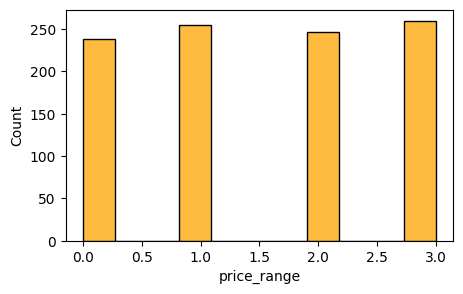

In [66]:
plt.figure(figsize = (5, 3))

sns.histplot(tree_result, x = 'price_range', color = 'orange')

plt.show()

In [67]:
tree_result['price_range'].value_counts()

price_range
3    260
1    255
2    247
0    238
Name: count, dtype: int64